# WeatherPy
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"In total we selected {len(cities)} cities.")

In total we selected 648 cities.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather"
units = 'imperial'
url_units = url + "?appid=" + weather_api_key + "&units=" + units

def cityQuery(city):
    return f"{url_units}&q={city}"

In [13]:
# set up lists to hold reponse info
temps = []
count = 0
set_count = 1
# Loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval')
print('-'*50)
for city in cities:
    count += 1
    if count%51 == 0:
        time.sleep(3)
        set_count += 1
        count = 1
    response = requests.get(cityQuery(city)).json()
    try:
        print(f"Processing Record {count} of Set {set_count} | {city}")
        temps.append({'City':response['name'],
                      'Cloudiness':response['clouds']['all'],
                      'Country':response['sys']['country'],
                      'Date':response['dt'],
                      'Humidity':response['main']['humidity'],
                      'Lat':response['coord']['lat'],
                      'Lng':response['coord']['lon'],
                      'Max Temp':response['main']['temp_max'],
                      'Wind Speed':response['wind']['speed']})
    except Exception as e:
        if e.args[0] == 'name':
            print('City not found. Skipping...')
        else:
            print(f"Didn't have any {e} listed.")
            
print('-'*50)
print('Data Retrieval Complete')
print('-'*50)

Beginning Data Retrieval
--------------------------------------------------
Processing Record 1 of Set 1 | saleilua
City not found. Skipping...
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | eureka
Processing Record 4 of Set 1 | bathsheba
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | haflong
Processing Record 8 of Set 1 | shushtar
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | makakilo city
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | mar del plata
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | saint-joseph
Processing Record 16 of Set 1 | pevek
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | alba

Processing Record 42 of Set 4 | teya
Processing Record 43 of Set 4 | santa cruz
Processing Record 44 of Set 4 | newport
Processing Record 45 of Set 4 | lazaro cardenas
Processing Record 46 of Set 4 | saskylakh
Processing Record 47 of Set 4 | bluff
Processing Record 48 of Set 4 | barmer
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | champasak
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | siddapur
Processing Record 5 of Set 5 | lincoln
Processing Record 6 of Set 5 | pyshchug
Processing Record 7 of Set 5 | prince george
Processing Record 8 of Set 5 | marcona
City not found. Skipping...
Processing Record 9 of Set 5 | ostrovnoy
Processing Record 10 of Set 5 | verkhnevilyuysk
Processing Record 11 of Set 5 | gurupi
Processing Record 12 of Set 5 | ginda
Processing Record 13 of Set 5 | mahebourg
Processing Record 14 of Set 5 | omboue
Processing Record 15 of Set 5 |

Processing Record 36 of Set 8 | waw
Processing Record 37 of Set 8 | el vigia
Processing Record 38 of Set 8 | rumuruti
Processing Record 39 of Set 8 | antofagasta
Processing Record 40 of Set 8 | bonfim
Processing Record 41 of Set 8 | monrovia
Processing Record 42 of Set 8 | kristiinankaupunki
Processing Record 43 of Set 8 | sitka
Processing Record 44 of Set 8 | the valley
Processing Record 45 of Set 8 | tuy hoa
Processing Record 46 of Set 8 | washington
Processing Record 47 of Set 8 | gazanjyk
Processing Record 48 of Set 8 | cap malheureux
Processing Record 49 of Set 8 | wilmington
Processing Record 50 of Set 8 | bontang
Processing Record 1 of Set 9 | pousat
City not found. Skipping...
Processing Record 2 of Set 9 | surt
Processing Record 3 of Set 9 | kahului
Processing Record 4 of Set 9 | constitucion
Processing Record 5 of Set 9 | agadez
Processing Record 6 of Set 9 | cockburn harbour
City not found. Skipping...
Processing Record 7 of Set 9 | toliary
City not found. Skipping...
Proces

Processing Record 29 of Set 12 | jieshi
Processing Record 30 of Set 12 | floro
Processing Record 31 of Set 12 | barcelos
Processing Record 32 of Set 12 | mizdah
Processing Record 33 of Set 12 | porbandar
Processing Record 34 of Set 12 | barra do corda
Processing Record 35 of Set 12 | suhbaatar
Processing Record 36 of Set 12 | karauzyak
City not found. Skipping...
Processing Record 37 of Set 12 | axim
Processing Record 38 of Set 12 | mandalgovi
Processing Record 39 of Set 12 | ajdabiya
Processing Record 40 of Set 12 | shitkino
Processing Record 41 of Set 12 | baglan
Processing Record 42 of Set 12 | tabory
Processing Record 43 of Set 12 | nha trang
Processing Record 44 of Set 12 | rockingham
Processing Record 45 of Set 12 | maneadero
Processing Record 46 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 47 of Set 12 | qasigiannguit
Processing Record 48 of Set 12 | manali
Processing Record 49 of Set 12 | price
Processing Record 50 of Set 12 | norden
Processing Record 1 of 

In [14]:
print(f"There were {len(cities)-len(temps)} cities that the API couldn't find.")
print(f"So now we are left with data from {len(temps)} cities.")

There were 48 cities that the API couldn't find.
So now we are left with data from 600 cities.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# Create the DataFrame
weather_df = pd.DataFrame(temps)
# Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Eureka,90,US,1585072007,87,40.80,-124.16,51.01,10.29
1,Bathsheba,40,BB,1585072007,62,13.22,-59.52,84.20,21.92
2,Tiksi,23,RU,1585072007,95,71.69,128.87,-23.71,2.93
3,Hermanus,0,ZA,1585072007,69,-34.42,19.23,70.00,3.00
4,Hāflong,0,IN,1585072007,60,25.18,93.03,67.01,2.53


In [18]:
# Be sure that we have all the information (600) in each column
weather_df.count()

City          600
Cloudiness    600
Country       600
Date          600
Humidity      600
Lat           600
Lng           600
Max Temp      600
Wind Speed    600
dtype: int64

In [19]:
# and output the data as a csv to our previously saved location
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [20]:
# I'm going to defint a function that will plot each of our desired comparisons
def Lat_vs_plot(y_values, units):
    
    # Start by establishing the figure size
    plt.figure(figsize=(10, 7))
    
    # Every plot has the Lat as the x-axis, and for fun, I will make each plot
    #  also have Lng as the colored z-axis to see if we can find any other relationships
    plt.scatter(weather_df["Lat"], weather_df[y_values],
                edgecolors="black", alpha=0.7, c=weather_df['Lng'])
    
    # This will create a title with the date of which you run your data collection
    plt.title(f"City Latitude vs. {y_values} ({time.strftime('%m/%d/%y')})")
    
    # All of the other typical labels, limits, and saving the figure
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_values} ({units})")
    plt.colorbar(label= 'Longitude')
    plt.xlim(-60,80)
    plt.grid (b=True, which="major", axis="both", color="lightgrey")
    plt.savefig(f"output_data/Lat_vs_{y_values}.png")
    plt.show()

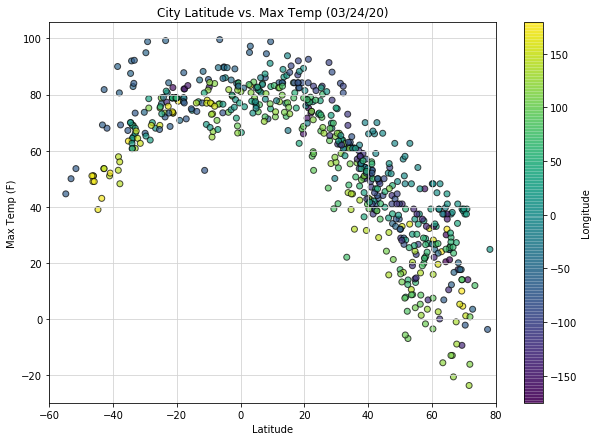

In [21]:
Lat_vs_plot('Max Temp', 'F')

#### Latitude vs. Humidity Plot

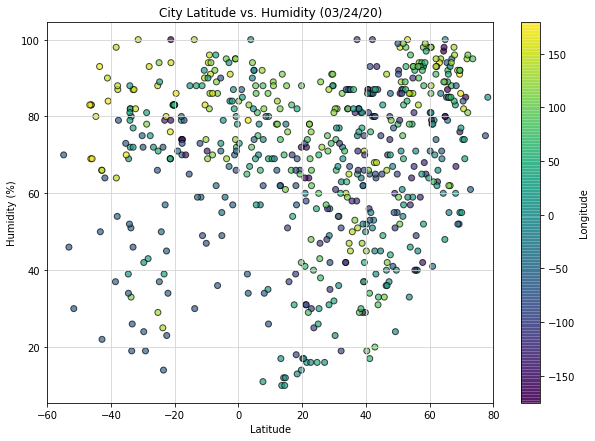

In [22]:
Lat_vs_plot('Humidity', '%')

#### Latitude vs. Cloudiness Plot

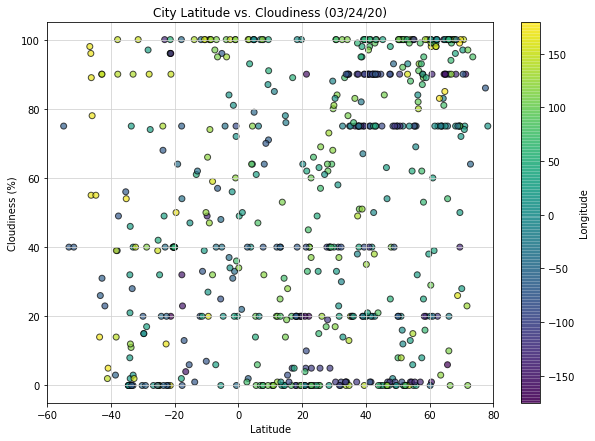

In [23]:
Lat_vs_plot('Cloudiness', '%')

#### Latitude vs. Wind Speed Plot

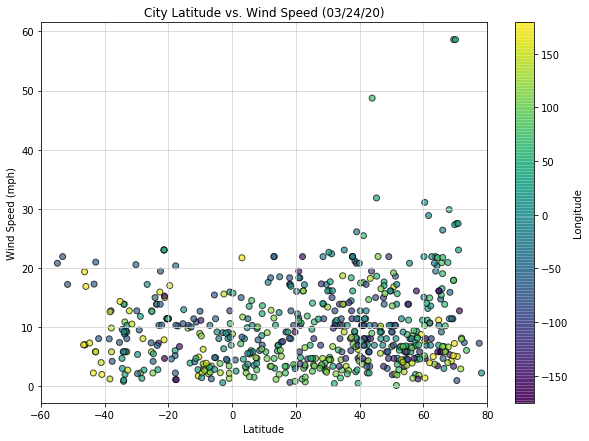

In [24]:
Lat_vs_plot('Wind Speed', 'mph')

## Linear Regression

In [122]:
# I'm going to again define a finction that will plot the Northern
#  and Southern regression lines on the respective scatter plots
def Northern_Lat_Regression(y, units):
    
    # Convert to floats and store Northern Latitudes and Max Temps as x and y values
    x_values = weather_df.loc[weather_df['Lat']>0]['Lat'].astype(float)
    y_values = weather_df.loc[weather_df['Lat']>0][y].astype(float)
    z_values = weather_df.loc[weather_df['Lat']>0]['Lng'].astype(float)
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot, regression line and the line equation 
    plt.scatter(x_values, y_values, c=z_values, alpha=0.5)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,y_values.mean()),fontsize=15,color="red")

    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel(f"{y} ({units})")
    plt.colorbar(label= 'Longitude')

    #Save an image
    plt.savefig(f"output_data/North_Hem_{y}_Regression.png")

    # Print r square value
    print(f"R squard: {rvalue**2}")

    # Show plot
    plt.show()

In [123]:
# Same as above
def Southern_Lat_Regression(y, units):
    x_values = weather_df.loc[weather_df['Lat']<0]['Lat'].astype(float)
    y_values = weather_df.loc[weather_df['Lat']<0][y].astype(float)
    z_values = weather_df.loc[weather_df['Lat']<0]['Lng'].astype(float)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, c=z_values, alpha=0.5)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(-50,y_values.mean()),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f"{y} ({units})")
    plt.colorbar(label= 'Longitude')
    plt.savefig(f"output_data/South_Hem_{y}_Regression.png")
    print(f"R squard: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.750913705871143


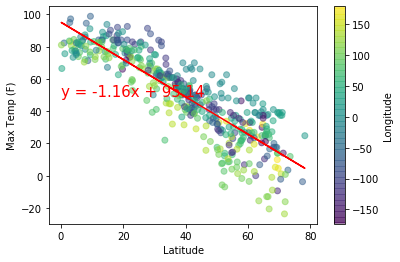

In [124]:
Northern_Lat_Regression('Max Temp', 'F')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.34798685409734614


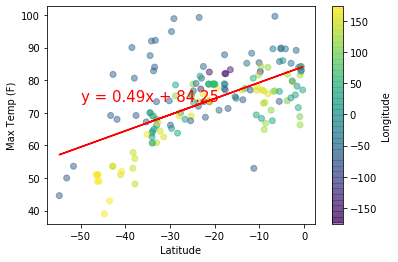

In [125]:
Southern_Lat_Regression('Max Temp', 'F')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.0813666674879288


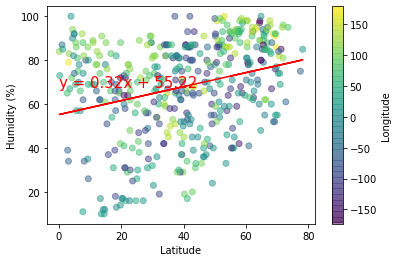

In [126]:
Northern_Lat_Regression('Humidity', '%')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.054169597258506265


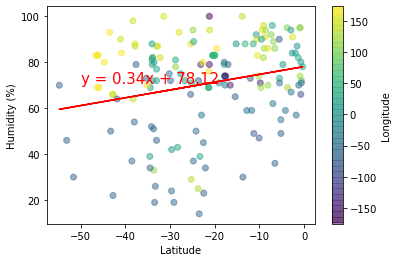

In [127]:
Southern_Lat_Regression('Humidity', '%')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.09433143889647017


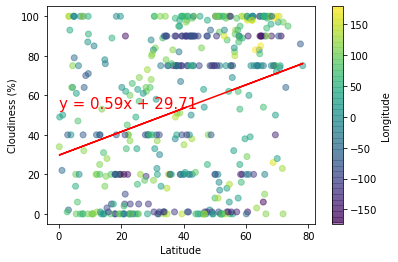

In [128]:
Northern_Lat_Regression('Cloudiness', '%')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.029002362755998788


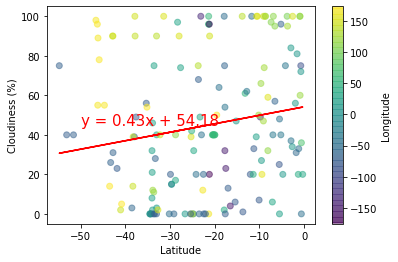

In [129]:
Southern_Lat_Regression('Cloudiness', '%')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.025369328146006523


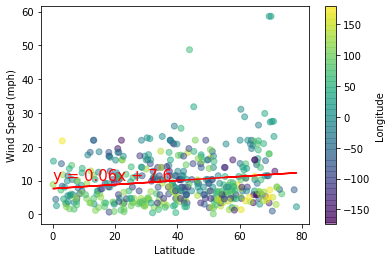

In [130]:
Northern_Lat_Regression('Wind Speed', 'mph')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.05469528082265544


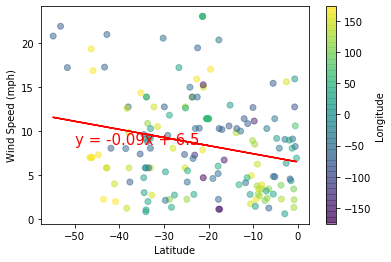

In [131]:
Southern_Lat_Regression('Wind Speed', 'mph')

## Analysis
* Temperature increases as we approach the equator as expected. The Southern hemisphere was a bit more disperse than the Northern, this could be due to the time of year. Would be interesting to run this once a quarter. 


* Geographic location doesn't seem to have an effect on humidity, cloudiness, or wind speed. I assume topography and proximity to large bodies of water affect those much more. 


* Not much came from breaking out the Longitude in the colored z-axis except in one plot: notice on the Northern_Lat_Regression plot for Temperature that between -50 to -150 Longitude ( *North America* ) it seems to be slightly warmer compared to 50 to 150 Longitude ( *Asia* ). There is a chance this is due to my samples, but it showed up all three times I reran the random generator cell to get new cities. It is more likely that today it's just a bit warmer on this side of the world than that side. Hard to prove anything more conclusive than that unless I run it different times throughout the year...